In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten,Dropout
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Input, Activation, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
import pickle 
from PIL import Image
import os
import cv2
import math
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import random
import json
%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_csvfile():
    data = pd.read_csv('driving_log.csv', names=['center', 'left', 'right', 'centerval', 'leftval', 'rightval', 'speedval'] )
    return data

In [3]:
#获取数据
def getdata(csvdata,split=0.2):
    x_train =[]
    y_train =[]

    for row in csvdata['center'].values:
        x_train.append(row.strip())
    
    for row in csvdata['centerval'].values:
        y_train.append(row)
    #addleft
    for row in csvdata['left'].values:
        x_train.append(row.strip())
    
    for row in csvdata['centerval'].values:
        y_train.append(row+0.1)

    #add right 
    for row in csvdata['right'].values:
        x_train.append(row.strip())
    
    for row in csvdata['centerval'].values:
        y_train.append(row-0.1)
    
    #print('total size =' +str(len(x_train)))
    
    #定义分割的数据位置
    #spit_index = len(x_train) - len(x_train)*split
    #spit_index = len(x_train) - 5500
    
    #print ('validata size = '+str(5500))
    #train_x =x_train[:spit_index]
    #train_y =y_train[:spit_index]
    #valid_x =x_train[spit_index:]
    #valid_y = y_train[spit_index:]
    #return train_x,train_y ,valid_x,valid_y
    return x_train,y_train

In [4]:
#处理图片
def processimg(images):
   
    #通过消除图像的前40像素(模型)因为它是无用的
    #调整图像大小
    #改变图像从RGB到YUV(这确实有助于平滑图像的模型有更少的信息处理)
    images = images[40:,:,:]
    images = cv2.resize(images,(200,66),interpolation=cv2.INTER_CUBIC)
    images =cv2.cvtColor(images,cv2.COLOR_BGR2YUV)
    return images.astype('float32')

In [5]:
#从图片路径中读取图片
def getImageFromTrainPath(x_train,y_train):
    x_train_noraml=[]
  

    feature = np.zeros((len(x_train),66,200,3))
    labels = np.zeros(len(x_train))
    
    for paths in x_train:
        tempimg = plt.imread(paths)
        tempimg =processimg(tempimg)
        x_train_noraml.append(tempimg)
    
    print('process image ok')
    return x_train_noraml,y_train

In [6]:
img_width = 66
img_height = 200

def naviva_network():
    model = Sequential()
    dropout=0.5

    #lay1
    model.add(Conv2D(24,5,5,input_shape=(img_width ,img_height,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay2
    model.add(Conv2D(36,5,5))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay3
    model.add(Conv2D(48,5,5))
    model.add(MaxPooling2D((2,2),border_mode='same'))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay4
    model.add(Conv2D(64,3,3))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))
    #lay5
    model.add(Conv2D(64,3,3))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #flatten
    model.add(Flatten())

    #fullconnected1
    model.add(Dense(1164,activation='relu'))
    model.add(Dropout(dropout))

    #fullconnected2
    model.add(Dense(100,activation='relu'))

    #fullconnected3
    model.add(Dense(50,activation='relu'))

    #fullconnected4
    model.add(Dense(10,activation='relu'))

    #fullconnected5
    model.add(Dense(1))

    return model

In [7]:
#图像转换，3维转4维
def converimage(train_x):
    x_train_processed_image=np.zeros((len(train_x),img_width,img_height,3))
    index=0
    for img in train_x:
        x_train_processed_image[index] =img
        index =index+1
    
    print('convert image ok')
    return x_train_processed_image
    

In [8]:

### 程序
data=get_csvfile()
train_x,train_y =getdata(data)

train_x,train_y=getImageFromTrainPath(train_x,train_y)
#valid_x,valid_y=getImageFromTrainPath(valid_x,valid_y)

train_x=converimage(train_x)
#valid_x=converimage(valid_x)



process image ok
convert image ok


In [9]:
#from sklearn.cross_validation import train_test_split

# Get randomized datasets for training and test
#train_x, X_test, train_y, y_test = train_test_split(
    #train_x,
    #train_y,
    #test_size=0.10)





In [10]:
print(len(train_x))
print(len(train_y))
#print(len(valid_x))
#print(len(valid_y))

24108
24108


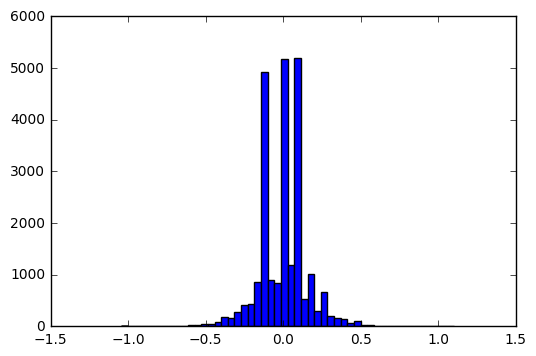

In [11]:
###############look y_train##############
plt.hist(train_y,50)
plt.show()

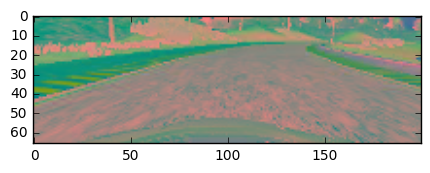

In [12]:
###################display one imgs #####################
import random
%matplotlib inline

index = random.randint(0,len(train_x))
image = train_x[index]
plt.figure(figsize=(5,5))
plt.imshow(image)

In [13]:


train_y =np.array(train_y)
#valid_y =np.array(valid_y)

model = naviva_network()
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

#history = model.fit_generator((train_x,train_y,batch_size=256),samples_per_epoch=len(train_x),nb_epoch=10,verbose=1,
                              #validation_data=(valid_x,valid_y),nb_val_samples=len(valid_x))

history=model.fit(train_x,train_y,batch_size=128,nb_epoch=20,verbose=1,validation_split=0.2)


#score = model.evaluate(X_test, y_test, verbose=0)
#print('Test score:', score[0])
#print('Test accuracy:', score[1])

#保存
with open('model.json', 'w') as fd:
    json.dump(model.to_json(), fd)
    
model.save_weights('model.h5')
print('model save successed')

Train on 19286 samples, validate on 4822 samples
Epoch 1/20
19286/19286 [==============================] - 424s - loss: 0.0269 - acc: 0.2253 - val_loss: 0.0385 - val_acc: 0.0000e+00
Epoch 2/20
19286/19286 [==============================] - 420s - loss: 0.0165 - acc: 0.2261 - val_loss: 0.0298 - val_acc: 0.0000e+00
Epoch 3/20
19286/19286 [==============================] - 415s - loss: 0.0127 - acc: 0.2261 - val_loss: 0.0194 - val_acc: 0.0000e+00
Epoch 4/20
19286/19286 [==============================] - 414s - loss: 0.0110 - acc: 0.2261 - val_loss: 0.0163 - val_acc: 0.0000e+00
Epoch 5/20
19286/19286 [==============================] - 415s - loss: 0.0106 - acc: 0.2261 - val_loss: 0.0161 - val_acc: 0.0000e+00
Epoch 6/20
19286/19286 [==============================] - 414s - loss: 0.0102 - acc: 0.2261 - val_loss: 0.0162 - val_acc: 0.0000e+00
Epoch 7/20
19286/19286 [==============================] - 414s - loss: 0.0101 - acc: 0.2261 - val_loss: 0.0162 - val_acc: 0.0000e+00
Epoch 8/20
19286/192

In [14]:
#保存
with open('model.json', 'w') as fd:
    json.dump(model.to_json(), fd)
    
model.save_weights('model.h5')
print('model save successed')

model save successed
